In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates
import yfinance as yf
from datetime import datetime, timedelta
import os
from matplotlib.widgets import CheckButtons
from scipy.stats import linregress

[*********************100%***********************]  1 of 1 completed
Data collected for CARL-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for COLO-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for DANSKE.CO
[*********************100%***********************]  1 of 1 completed
Data collected for DSV.CO
[*********************100%***********************]  1 of 1 completed
Data collected for MAERSK-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for NOVO-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for GN.CO
[*********************100%***********************]  1 of 1 completed
Data collected for ORSTED.CO
[*********************100%***********************]  1 of 1 completed
Data collected for PNDORA.CO
[*********************100%***********************]  1 of 1 completed
Data collected for RBREW.CO
[*********************100%

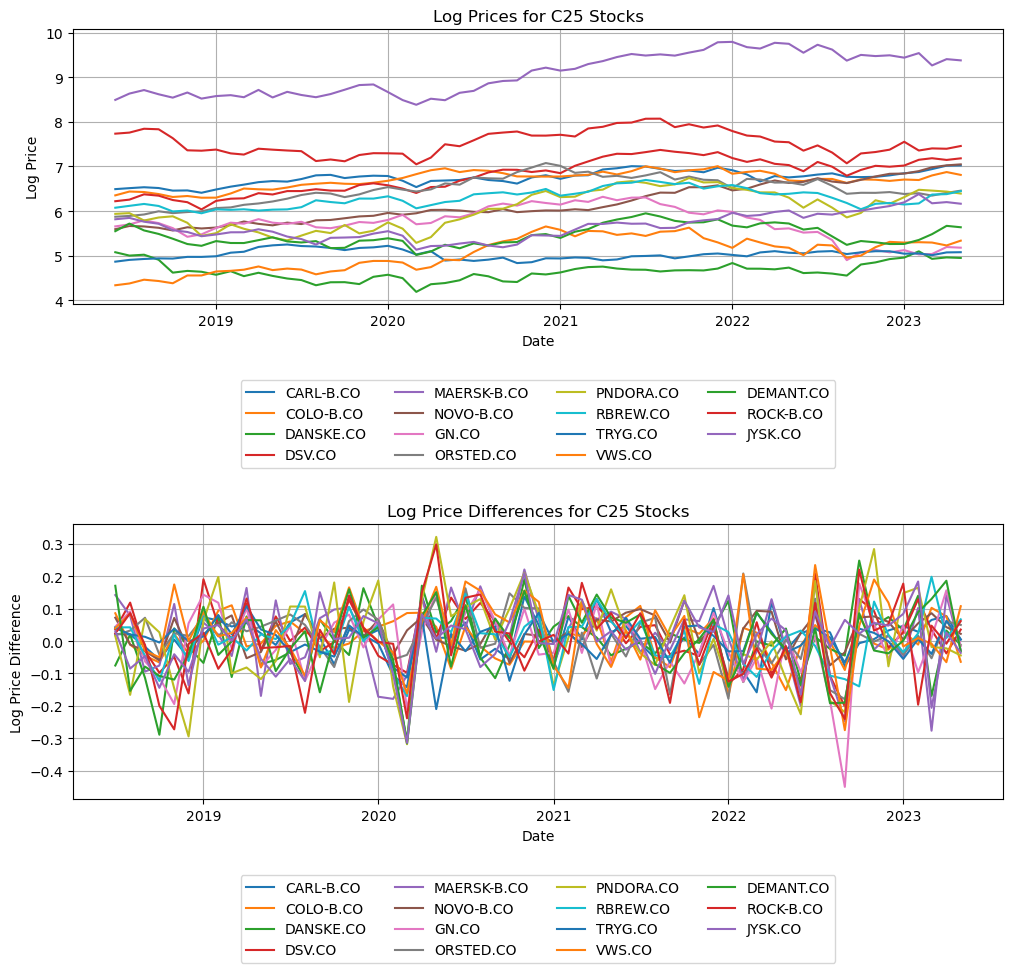

In [137]:
# Define the list of stocks in the Danish C25 index
c25_stocks = [
    'CARL-B.CO', 'COLO-B.CO', 'DANSKE.CO', 'DSV.CO',
    'MAERSK-B.CO', 'NOVO-B.CO', 'GN.CO',
    'ORSTED.CO', 'PNDORA.CO', 'RBREW.CO', 'TRYG.CO',
    'VWS.CO', 'DEMANT.CO', 'ROCK-B.CO', 'JYSK.CO',
]

# Set the start and end dates for the data collection
start_date = '2018-05-22'
end_date = '2023-05-22'

# Create a directory to store the data
output_dir = 'c25_stock_data'
os.makedirs(output_dir, exist_ok=True)

# Collect stock data for each company
data_collection = {}

for stock in c25_stocks:
    print(f"Collecting data for {stock}...")
    try:
        # download from yfinance
        data = yf.download(stock, start=start_date, end=end_date, interval='1mo')

        # Save the data to a CSV file
        filename = f"{output_dir}/{stock}.csv"
        data.to_csv(filename)

        # Store the data in the data collection
        data_collection[stock] = data

        print(f"Data collected for {stock}")
    except Exception as e:
        print(f"Error collecting data for {stock}: {e}")
        
print("Data collection complete.")

# Calculate average log price differences for each stock
avg_log_diff_prices = {}

for stock, data in data_collection.items():
    log_diff = data['Adj Close'].apply(np.log).diff()
    avg_log_diff_prices[stock] = log_diff.mean() * 100

# Print the results for each stock
for stock, avg_diff in avg_log_diff_prices.items():
    print(f"Average log price difference for {stock}: {avg_diff}")

# Create subplots for log prices and log price differences
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.8)

# Plot log prices for all stocks
axs[0].set_title("Log Prices for C25 Stocks")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Log Price")

for stock, data in data_collection.items():
    data['Log_Price'] = np.log(data['Adj Close'])
    axs[0].plot(data.index, data['Log_Price'], label=stock)

axs[0].grid(True)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)

# Plot log price differences for all stocks
axs[1].set_title("Log Price Differences for C25 Stocks")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Log Price Difference")

for stock, data in data_collection.items():
    data['Log_Price_Diff'] = data['Log_Price'].diff()
    axs[1].plot(data.index, data['Log_Price_Diff'], label=stock)

axs[1].grid(True)
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)


In [138]:
# Store the Companies ESG Scores file and merge with data from yfinance
esg_scores_file = 'Companies ESG scores2.csv'
esg_scores_data = pd.read_csv(esg_scores_file, delimiter=";")

merged_data = pd.DataFrame({'stock': c25_stocks})

# Merge with the average log differences
merged_data['Average Log Difference'] = merged_data['stock'].map(avg_log_diff_prices)
merged_data['ESG Score'] = esg_scores_data['ESG Score']
print(merged_data)

          stock  Average Log Difference  ESG Score
0     CARL-B.CO                0.902037         77
1     COLO-B.CO                0.778118         75
2     DANSKE.CO               -0.217341         75
3        DSV.CO                1.630754         81
4   MAERSK-B.CO                1.503509         71
5     NOVO-B.CO                2.465136         85
6         GN.CO               -0.809891         74
7     ORSTED.CO                0.992016         76
8     PNDORA.CO                0.771586         77
9      RBREW.CO                0.630759         62
10      TRYG.CO                0.359390         68
11       VWS.CO                1.696428         73
12    DEMANT.CO                0.149016         56
13    ROCK-B.CO               -0.469275         69
14      JYSK.CO                0.590693         53


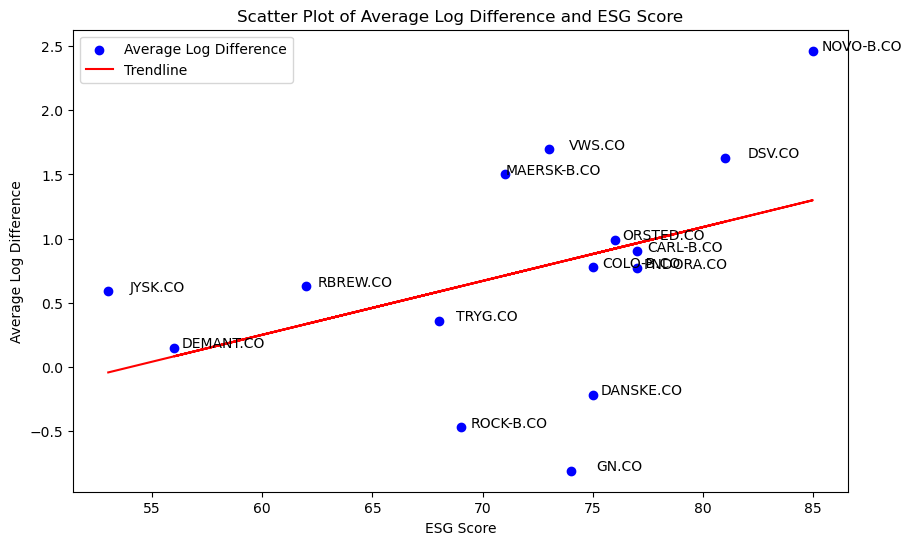

The slope of the trendline is: 0.0420


In [139]:
# Set up scatter plot for average log differences and ESG scores 
plt.figure(figsize=(10,6))
x = merged_data['ESG Score']
y = merged_data['Average Log Difference']
plt.scatter(x, y, color='blue', label="Average Log Difference")
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trendline = intercept + slope * x
plt.plot(x, trendline, color='red', label="Trendline")
for i, stock in enumerate(merged_data['stock']):
    plt.annotate(stock, (x[i], y[i]), textcoords="offset points", xytext=(35, 0), ha='center')
plt.xlabel("ESG Score")
plt.ylabel("Average Log Difference")
plt.title("Scatter Plot of Average Log Difference and ESG Score")
plt.legend()
plt.show()
print('The slope of the trendline is: {:.4f}'.format(slope))


In [140]:
# Calculate average log prices and standard deviations for each stock
avg_log_prices = {}
std_log_prices = {}

for stock, data in data_collection.items():
    log_prices = np.log(data['Adj Close'])
    avg_log_prices[stock] = log_prices.mean()
    std_log_prices[stock] = log_prices.std() * 100  

    # Print the results
    print(f"Average log price for {stock}: {avg_log_prices[stock]}")
    print(f"Standard deviation for {stock}: {std_log_prices[stock]}")
    print()



Average log price for CARL-B.CO: 6.750088811575856
Standard deviation for CARL-B.CO: 15.408082718276548

Average log price for COLO-B.CO: 6.707829146305792
Standard deviation for COLO-B.CO: 19.38953200654149

Average log price for DANSKE.CO: 4.6523407004750075
Standard deviation for DANSKE.CO: 19.702614992173938

Average log price for DSV.CO: 6.797862029273647
Standard deviation for DSV.CO: 37.6118341829267

Average log price for MAERSK-B.CO: 9.081843846032042
Standard deviation for MAERSK-B.CO: 45.71146553166572

Average log price for NOVO-B.CO: 6.172708888800362
Standard deviation for NOVO-B.CO: 43.872498215865484

Average log price for GN.CO: 5.740578542086196
Standard deviation for GN.CO: 36.56648241392705

Average log price for ORSTED.CO: 6.491645242384587
Standard deviation for ORSTED.CO: 30.13959164775829

Average log price for PNDORA.CO: 6.050899343249229
Standard deviation for PNDORA.CO: 42.400955412112665

Average log price for RBREW.CO: 6.2938788680668605
Standard deviation 

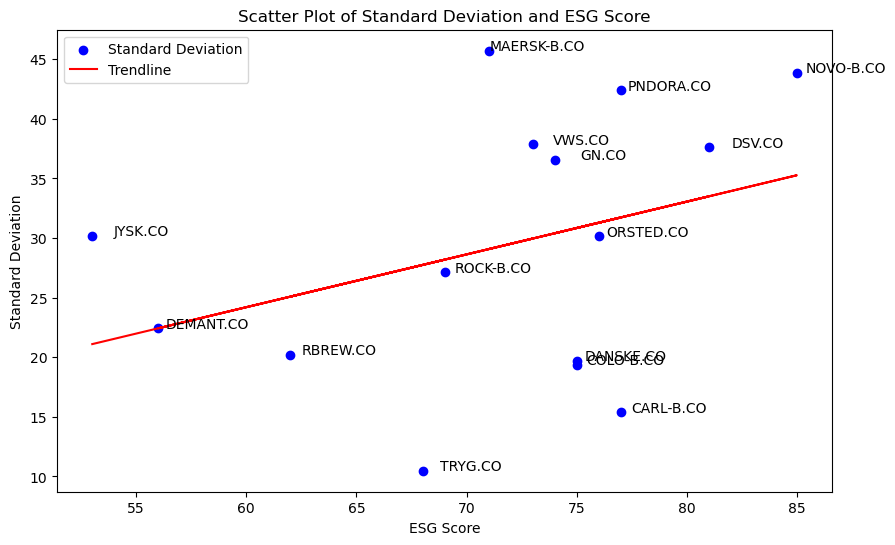

The slope of the trendline is: 0.4426


In [141]:
# Set up scatter plot for the standard deviation and ESG scores 
plt.figure(figsize=(10,6))
merged_data['Standard deviation'] = merged_data['stock'].map(std_log_prices)

x = merged_data['ESG Score']
y = merged_data['Standard deviation']

plt.scatter(x, y, color='blue', label="Standard Deviation")

slope, intercept, r_value, p_value, std_err = linregress(x, y)
trendline = intercept + slope * x
plt.plot(x, trendline, color='red', label="Trendline")

for i, stock in enumerate(merged_data['stock']):
    plt.annotate(stock, (x[i], y[i]), textcoords="offset points", xytext=(35, 0), ha='center')

plt.xlabel("ESG Score")
plt.ylabel("Standard Deviation")
plt.title("Scatter Plot of Standard Deviation and ESG Score")
plt.legend()
plt.show()

print('The slope of the trendline is: {:.4f}'.format(slope))

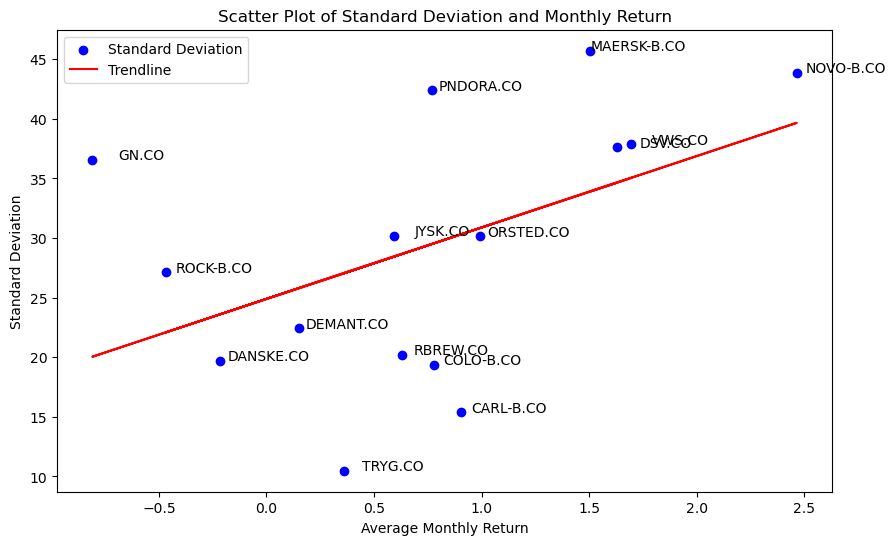

The slope of the trendline is: 5.9919


In [142]:
# Set up scatter plot for standard deviation and average log differences
plt.figure(figsize=(10,6))

x = merged_data['Average Log Difference']
y = merged_data['Standard deviation']

plt.scatter(x, y, color='blue', label="Standard Deviation")

slope, intercept, r_value, p_value, std_err = linregress(x, y)
trendline = intercept + slope * x
plt.plot(x, trendline, color='red', label="Trendline")

for i, stock in enumerate(merged_data['stock']):
    plt.annotate(stock, (x[i], y[i]), textcoords="offset points", xytext=(35, 0), ha='center')

plt.xlabel("Average Monthly Return")
plt.ylabel("Standard Deviation")
plt.title("Scatter Plot of Standard Deviation and Monthly Return")
plt.legend()
plt.show()

print('The slope of the trendline is: {:.4f}'.format(slope))